# Libraries

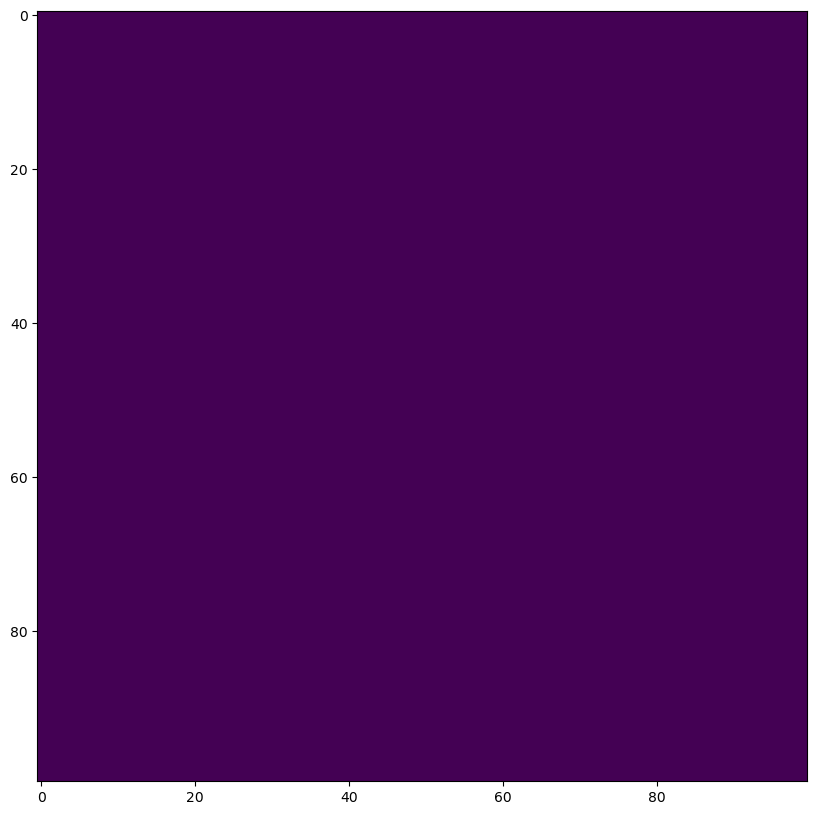

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, fsize=(10, 10)):
    figure = plt.figure(figsize=fsize)
    plt.imshow(img)
    plt.show()
show(np.zeros((100, 100)))

# gradients

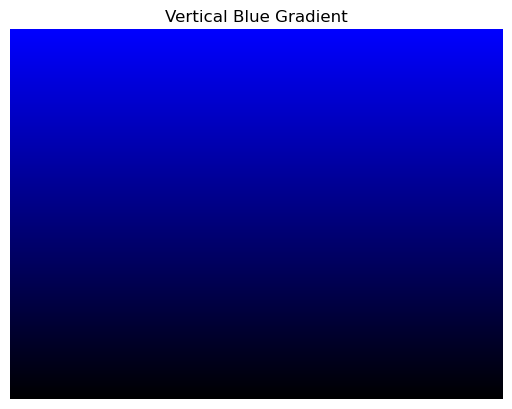

In [14]:
# Add vertical gradient (blue-to-black)
for y in range(bg.shape[0]):
    bg[y, :, 0] = 255 - int(y / bg.shape[0] * 255)
show(bg, "Vertical Blue Gradient")


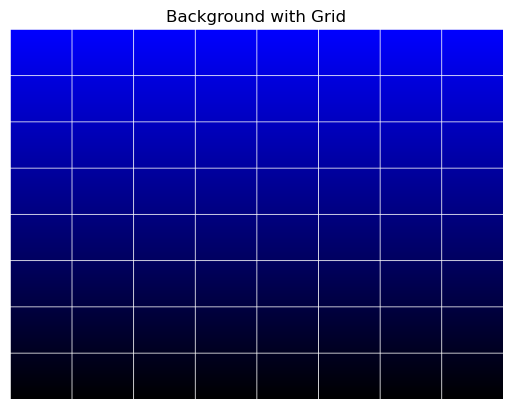

In [15]:
# Draw grid lines
bg_with_grid = bg.copy()
for x in range(0, 640, 80):
    cv2.line(bg_with_grid, (x, 0), (x, 480), (255, 255, 255), 1)
for y in range(0, 480, 60):
    cv2.line(bg_with_grid, (0, y), (640, y), (255, 255, 255), 1)
show(bg_with_grid, "Background with Grid")


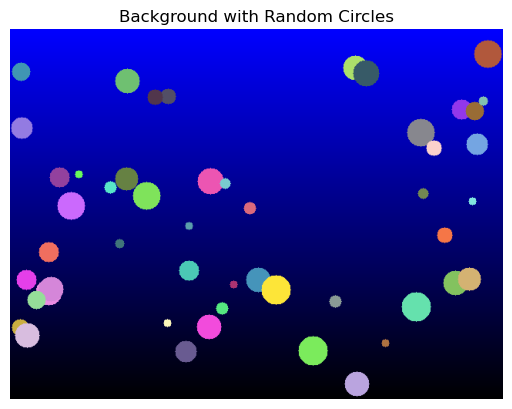

In [16]:
bg_with_dots = bg.copy()
for _ in range(50):
    center = (np.random.randint(0, 640), np.random.randint(0, 480))
    radius = np.random.randint(5, 20)
    color = (np.random.randint(50, 255), np.random.randint(50, 255), np.random.randint(50, 255))
    cv2.circle(bg_with_dots, center, radius, color, -1)
show(bg_with_dots, "Background with Random Circles")


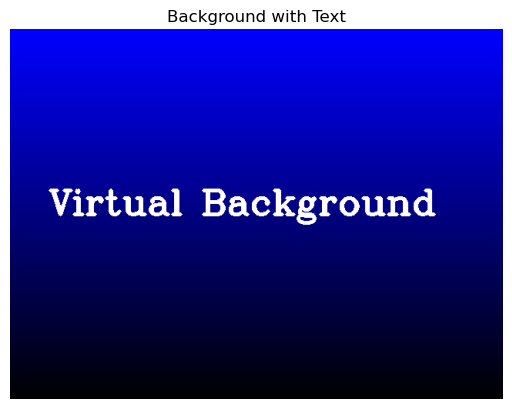

In [18]:
bg_with_text = bg.copy()
cv2.putText(bg_with_text, "Virtual Background", (50, 240),
            cv2.FONT_HERSHEY_COMPLEX, 1.5, (255, 255, 255), 3)
show(bg_with_text, "Background with Text")


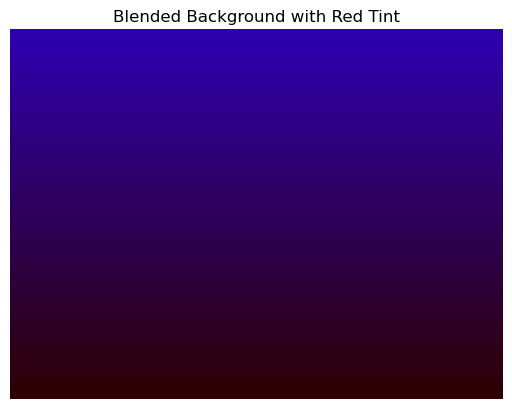

In [17]:
overlay = np.full_like(bg, (0, 0, 150))  # Red tint
blended = cv2.addWeighted(bg, 0.7, overlay, 0.3, 0)
show(blended, "Blended Background with Red Tint")


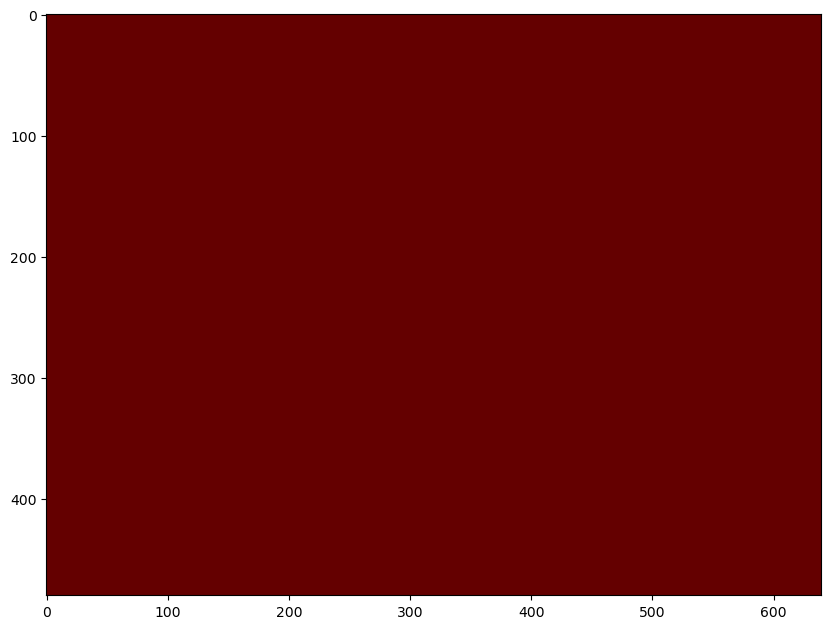

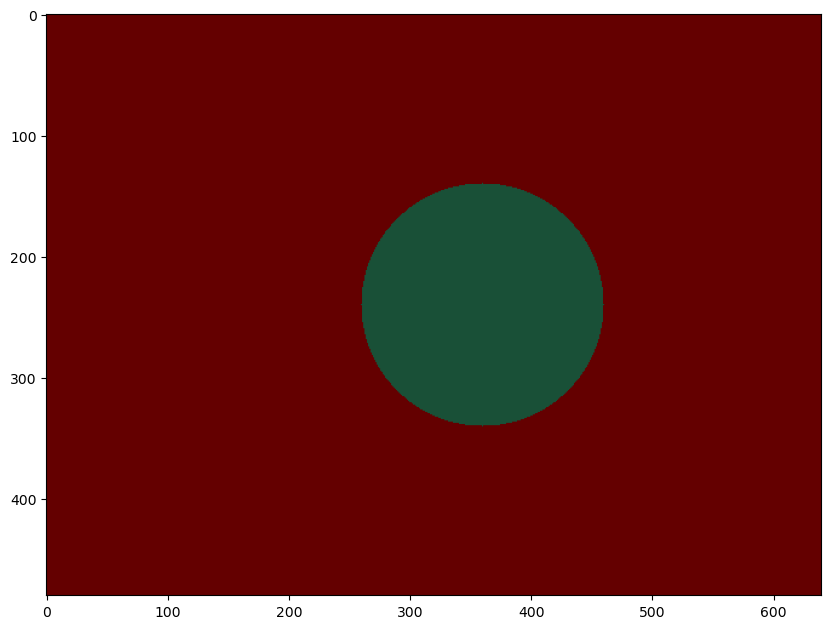

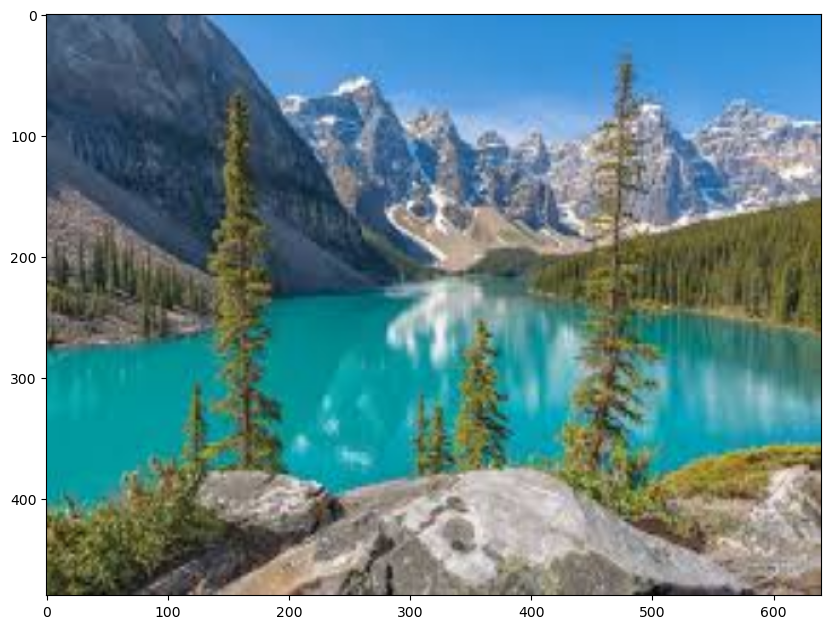

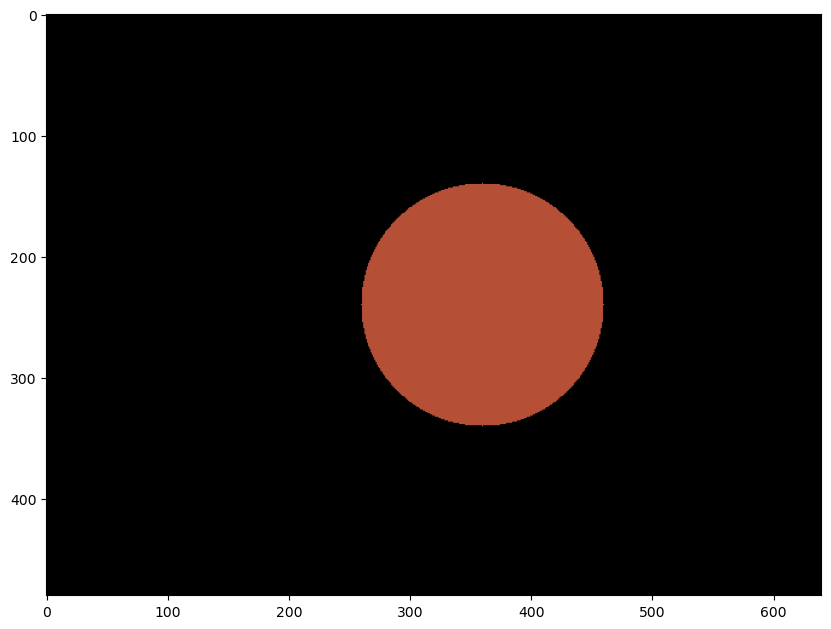

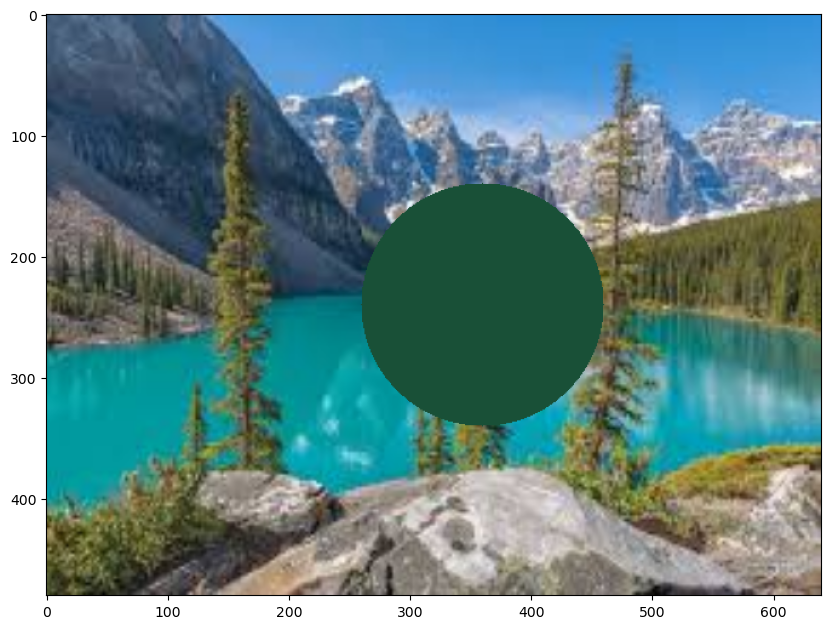

In [3]:
bg = np.zeros((480, 640, 3))
bg[:, :, 0] += 100
bg = bg.astype(np.uint8)
show(bg)

img = bg.copy()
cv2.circle(img, (360, 240), 100, (25, 80, 55), -1)
show(img)

scene = cv2.imread("Tree.jpg", -1)
scene = cv2.resize(scene, (img.shape[1], img.shape[0]))
rgb_scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)
show(rgb_scene)

mask = img-bg
show(mask)

res = rgb_scene.copy()
res[mask!=0] = img[mask!=0]
show(res)

In [22]:
scene = cv2.imread("Tree.jpg", -1)
scene = cv2.resize(scene, (img.shape[1], img.shape[0]))
rgb_scene = cv2.cvtColor(scene, cv2.COLOR_BGR2RGB)


In [23]:
bg = np.zeros((480, 640, 3))       # Create a black image (480x640, 3 color channels)
bg[:, :, 0] += 100                 # Add blue value to the entire image (blue tint)
bg = bg.astype(np.uint8)          # Convert to uint8 for OpenCV compatibility


img = bg.copy()
cv2.circle(img, (360, 240), 100, (25, 80, 55), -1)



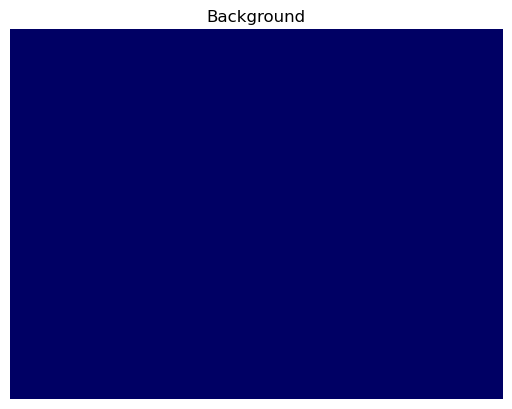

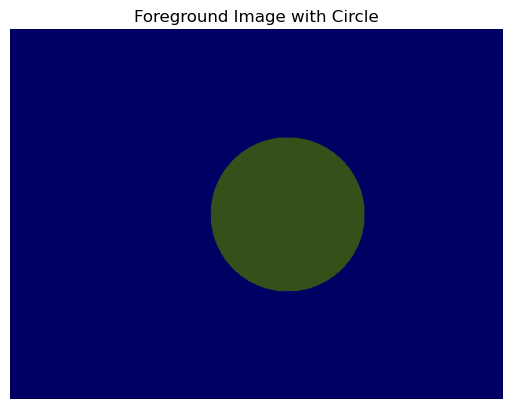

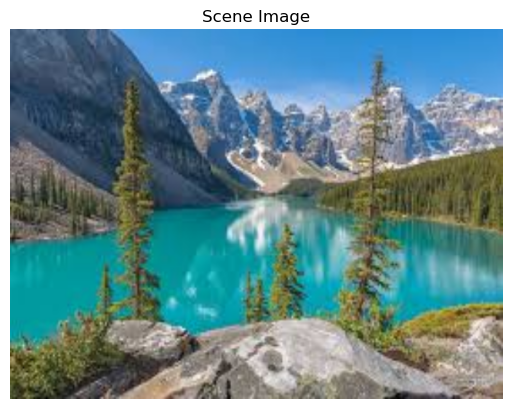

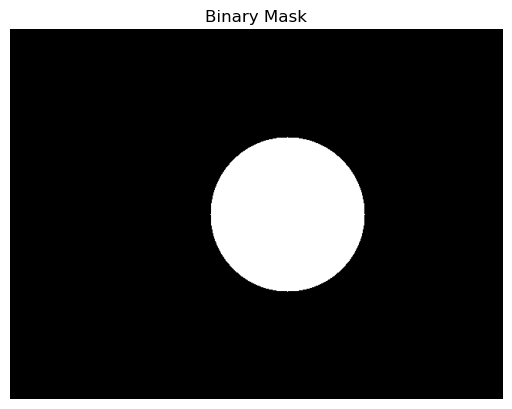

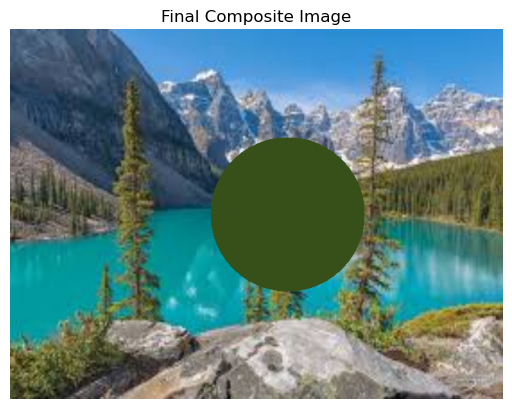

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

# 1. Create a uniform background
bg = np.zeros((480, 640, 3), dtype=np.uint8)
bg[:, :, 0] = 100  # Add blue tone
show(bg, 'Background')

# 2. Draw a circle on a copy of background
img = bg.copy()
cv2.circle(img, (360, 240), 100, (25, 80, 55), -1)
show(img, 'Foreground Image with Circle')

# 3. Load and resize scene image
scene = cv2.imread("Tree.jpg")
scene = cv2.resize(scene, (img.shape[1], img.shape[0]))
show(scene, 'Scene Image')

# 4. Create mask (improved method)
diff = cv2.absdiff(img, bg)
gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
_, mask = cv2.threshold(gray_diff, 10, 255, cv2.THRESH_BINARY)
show(cv2.merge([mask]*3), 'Binary Mask')

# 5. Invert mask
inv_mask = cv2.bitwise_not(mask)

# 6. Extract foreground and background
foreground = cv2.bitwise_and(img, img, mask=mask)
background = cv2.bitwise_and(scene, scene, mask=inv_mask)

# 7. Combine both to get final result
result = cv2.add(foreground, background)
show(result, 'Final Composite Image')


# Background Image

import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load and resize image
img = cv2.imread('fly.jpg')  # Replace with actual file
img = cv2.resize(img, (640, 480))
show(img, "Original Image")

# Convert to HSV color space
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Broader HSV range to capture more sky shades
lower_sky = np.array([80, 10, 80])    # Covers light blue to gray-blue
upper_sky = np.array([140, 255, 255])

# Create sky mask
sky_mask = cv2.inRange(hsv, lower_sky, upper_sky)

# Morphological operations to clean mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
sky_mask = cv2.morphologyEx(sky_mask, cv2.MORPH_CLOSE, kernel, iterations=2)
sky_mask = cv2.medianBlur(sky_mask, 7)

show(cv2.merge([sky_mask]*3), 'Cleaned Sky Mask')

# Invert mask to get non-sky parts
sky_mask_inv = cv2.bitwise_not(sky_mask)

# Extract foreground
foreground = cv2.bitwise_and(img, img, mask=sky_mask_inv)
show(foreground, "Sky Removed")

# Load replacement background
tree = cv2.imread('Tree.jpg')  # Replace with your background
tree = cv2.resize(tree, (640, 480))
sky_area = cv2.bitwise_and(tree, tree, mask=sky_mask)

# Combine foreground and new sky
final = cv2.add(foreground, sky_area)
show(final, "Sky Replaced with Tree Background")


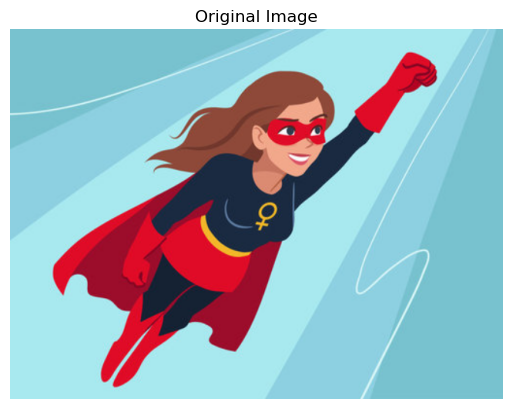

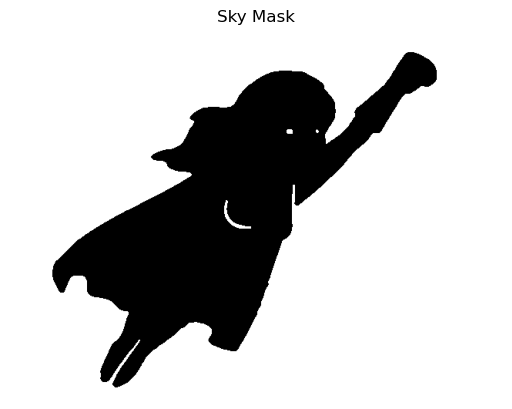

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title='Image'):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# 1. Load your image
img = cv2.imread('fly.jpg')  # Change to your actual filename
img = cv2.resize(img, (640, 480))  # Resize for consistency
show(img, 'Original Image')

# 2. Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 3. Define HSV range for blue sky (tweak if needed)
lower_sky = np.array([90, 20, 80])    # Lower bound for light blue sky
upper_sky = np.array([135, 255, 255]) # Upper bound for deep sky blue

# 4. Create mask for the sky
sky_mask = cv2.inRange(hsv, lower_sky, upper_sky)

# 5. Clean mask with morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
sky_mask = cv2.morphologyEx(sky_mask, cv2.MORPH_CLOSE, kernel)
sky_mask = cv2.medianBlur(sky_mask, 5)

show(cv2.merge([sky_mask]*3), 'Sky Mask')

# 6. Invert mask to


# Remove Background

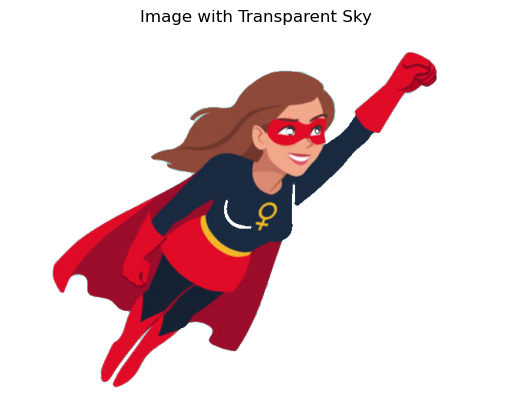

True

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show(img, title='Image'):
    if img.shape[2] == 4:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGRA2RGBA)
    else:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load the image
img = cv2.imread('fly.jpg')
img = cv2.resize(img, (640, 480))

# Convert to HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Blue sky color range
lower_sky = np.array([90, 20, 80])
upper_sky = np.array([135, 255, 255])
mask = cv2.inRange(hsv, lower_sky, upper_sky)

# Clean up mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.medianBlur(mask, 5)

# Add alpha channel to original image
b, g, r = cv2.split(img)
alpha = cv2.bitwise_not(mask)  # Invert: keep subject
rgba = cv2.merge([b, g, r, alpha])

# Show and save
show(rgba, "Image with Transparent Sky")
cv2.imwrite("family_no_sky.png", rgba)


# stream.py


In [ ]:
import streamlit as st
import cv2
import numpy as np
from PIL import Image

# ------------------ Title and Intro ------------------
st.title("🧍 Virtual Background Replacement")
st.markdown("""
This app lets you **remove and replace the background** from your uploaded image . Great for creating fun or professional portraits!

👉 Upload your photo with a background (preferably with blue sky or solid color)  
👉 Upload a new background image  
👉 Get a composite image with the background replaced!
""")

# ------------------ Upload Section ------------------
st.header("📷 Step 1: Upload Your Photo")
main_img_file = st.file_uploader("fly (with background)", type=["jpg", "jpeg", "png"])

st.header("🌄 Step 2: Upload New Background")
bg_img_file = st.file_uploader("Tree", type=["jpg", "jpeg", "png"])

# ------------------ Background Replacement Function ------------------
def replace_background(foreground_img, background_img):
    """Replaces sky/solid background in foreground image with another background image."""
    # Resize images to match
    foreground_img = cv2.resize(foreground_img, (640, 480))
    background_img = cv2.resize(background_img, (640, 480))

    # Convert to HSV color space for color-based segmentation
    hsv = cv2.cvtColor(foreground_img, cv2.COLOR_BGR2HSV)

    # Define color range for blue sky or similar backgrounds
    lower_sky = np.array([90, 20, 80])   # Lower HSV bound for blue
    upper_sky = np.array([135, 255, 255])  # Upper HSV bound

    # Create mask for background
    mask = cv2.inRange(hsv, lower_sky, upper_sky)

    # Clean up the mask
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    mask = cv2.medianBlur(mask, 5)

    # Invert mask to get foreground
    inv_mask = cv2.bitwise_not(mask)

    # Extract subject and background regions
    fg = cv2.bitwise_and(foreground_img, foreground_img, mask=inv_mask)
    bg = cv2.bitwise_and(background_img, background_img, mask=mask)

    # Combine them
    final = cv2.add(fg, bg)
    return final

# ------------------ Processing and Display ------------------
if main_img_file and bg_img_file:
    # Convert uploaded files to OpenCV images
    main_bytes = np.asarray(bytearray(main_img_file.read()), dtype=np.uint8)
    bg_bytes = np.asarray(bytearray(bg_img_file.read()), dtype=np.uint8)

    main_img = cv2.imdecode(main_bytes, 1)
    bg_img = cv2.imdecode(bg_bytes, 1)

    # Process the images
    st.info("🔄 Processing image. Please wait...")
    result = replace_background(main_img, bg_img)

    # Show the result
    st.subheader("✅ Result: Background Replaced")
    st.image(cv2.cvtColor(result, cv2.COLOR_BGR2RGB), caption="Final Output", use_column_width=True)

    # Download button
    output_image = Image.fromarray(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    st.download_button("⬇️ Download Result", output_image.tobytes(), file_name="virtual_background.jpg", mime="image/jpeg")

elif main_img_file or bg_img_file:
    st.warning("Please upload **both** images to proceed.")

# Footer
st.markdown("---")
st.caption("Developed with ❤️ using Streamlit and OpenCV")
